In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import MNLogit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import statsmodels.tsa.api as tsa
from pymer4.models import Lmer

In [59]:
# Load data
time_series_csv = "data/preprocessed/cleaned_wave_7_rq3.csv"
df = pd.read_csv(time_series_csv, low_memory=False)
df.head()

,Country,Country name,Survey year,C Police,C Parliament,C Civil Services,C Television,C Government,C Political Parties,C Courts,C NGOs,C TV News,C Elections,C International Criminal Court,Government order vs. freedom,Highest educational level,Age,Scale of incomes
0,8,ALB,1998,3,3,2,3,2,3,3,2,3,2,2,1,3,18.0,5
1,8,ALB,1998,3,3,3,3,3,3,3,2,3,2,2,1,4,18.0,4
2,8,ALB,1998,3,3,3,3,3,3,3,2,3,2,2,1,2,24.0,3
3,8,ALB,1998,2,2,2,3,2,3,3,2,3,2,2,1,3,26.0,6
4,8,ALB,1998,3,3,3,3,3,3,3,2,3,2,2,1,2,30.0,3


In [60]:
for col in df.columns:
    print(col)

Country
Country name
Survey year
C Police
C Parliament
C Civil Services
C Television
C Government
C Political Parties
C Courts
C NGOs
C TV News
C Elections
C International Criminal Court
Government order vs. freedom
Highest educational level
Age
Scale of incomes


In [61]:
# Filter for USA
df_usa = df[df["Country name"] == "USA"].copy()

# Convert 'Survey year' to integer
df_usa["Survey year"] = df_usa["Survey year"].astype(int)

# ✅ Reset index before converting "Survey year" to categorical
df_usa.reset_index(inplace=True)

# ✅ Convert Survey Year to string-based categorical
df_usa["Survey year"] = df_usa["Survey year"].astype(str)  # Convert to string
df_usa["Survey year"] = df_usa["Survey year"].astype("category")  # Convert to categorical


# Verify dataset
print(df_usa.tail())
print("✅ Data filtered for USA")

       index  Country Country name Survey year  C Police  C Parliament  \
8814  410445      840          USA        2017         3             2   
8815  410446      840          USA        2017         4             3   
8816  410447      840          USA        2017         4             4   
8817  410448      840          USA        2017         2             4   
8818  410449      840          USA        2017         2             3   

      C Civil Services  C Television  C Government  C Political Parties  \
8814                 3             3             2                    4   
8815                 3             4             4                    3   
8816                 4             4             4                    4   
8817                 4             4             4                    4   
8818                 2             3             3                    3   

      C Courts  C NGOs  C TV News  C Elections  \
8814         2       2          3            2   
8815

### Exploratory Analysis

/tmp/ipykernel_2322522/1361479167.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_conf_trend = df_usa.groupby("Survey year")["C Government"].mean().reset_index()


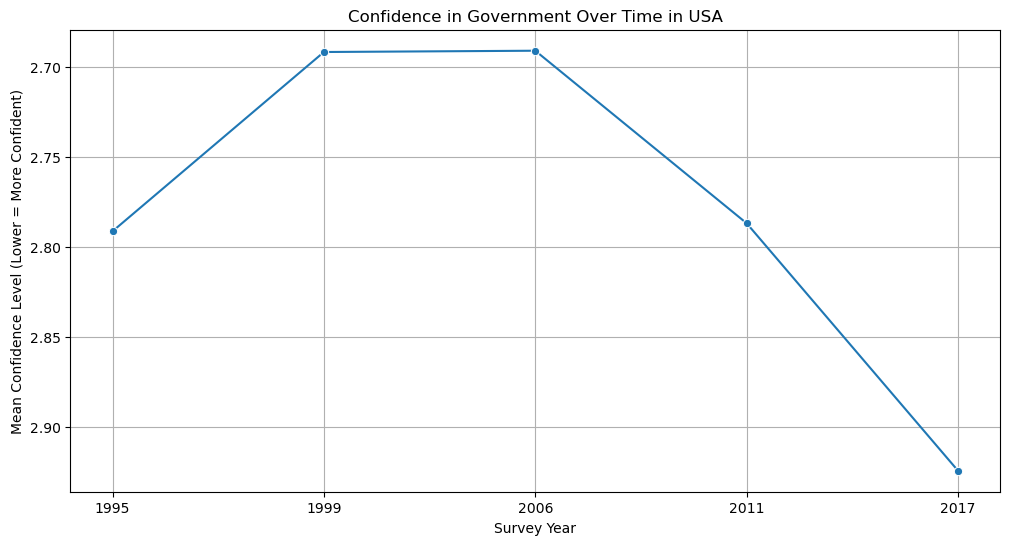

In [62]:
# Compute mean confidence level per year
df_conf_trend = df_usa.groupby("Survey year")["C Government"].mean().reset_index()

# Plot trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_conf_trend, x="Survey year", y="C Government", marker="o")
plt.gca().invert_yaxis()  # Since lower values mean more confidence
plt.title("Confidence in Government Over Time in USA")
plt.xlabel("Survey Year")
plt.ylabel("Mean Confidence Level (Lower = More Confident)")
plt.grid(True)
plt.show()


/tmp/ipykernel_2322522/12979450.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_inst_trend = df_usa.groupby("Survey year")[["C Elections", "C Courts", "C Political Parties", "C NGOs"]].mean().reset_index()


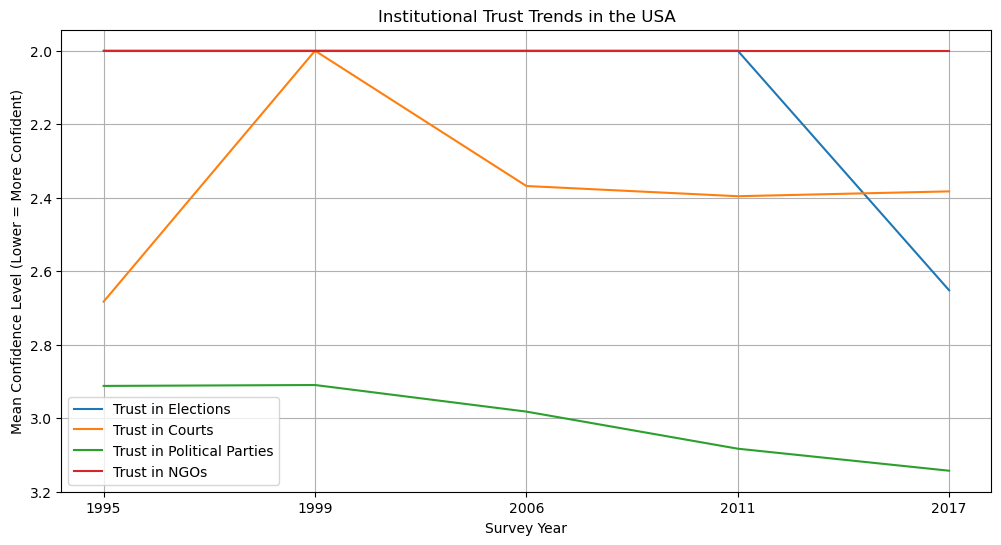

In [63]:
# Compute mean trust levels for key institutions over time
df_inst_trend = df_usa.groupby("Survey year")[["C Elections", "C Courts", "C Political Parties", "C NGOs"]].mean().reset_index()

# Plot trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_inst_trend, x="Survey year", y="C Elections", label="Trust in Elections")
sns.lineplot(data=df_inst_trend, x="Survey year", y="C Courts", label="Trust in Courts")
sns.lineplot(data=df_inst_trend, x="Survey year", y="C Political Parties", label="Trust in Political Parties")
sns.lineplot(data=df_inst_trend, x="Survey year", y="C NGOs", label="Trust in NGOs")
plt.gca().invert_yaxis()  # Lower values mean more confidence
plt.title("Institutional Trust Trends in the USA")
plt.xlabel("Survey Year")
plt.ylabel("Mean Confidence Level (Lower = More Confident)")
plt.legend()
plt.grid(True)
plt.show()


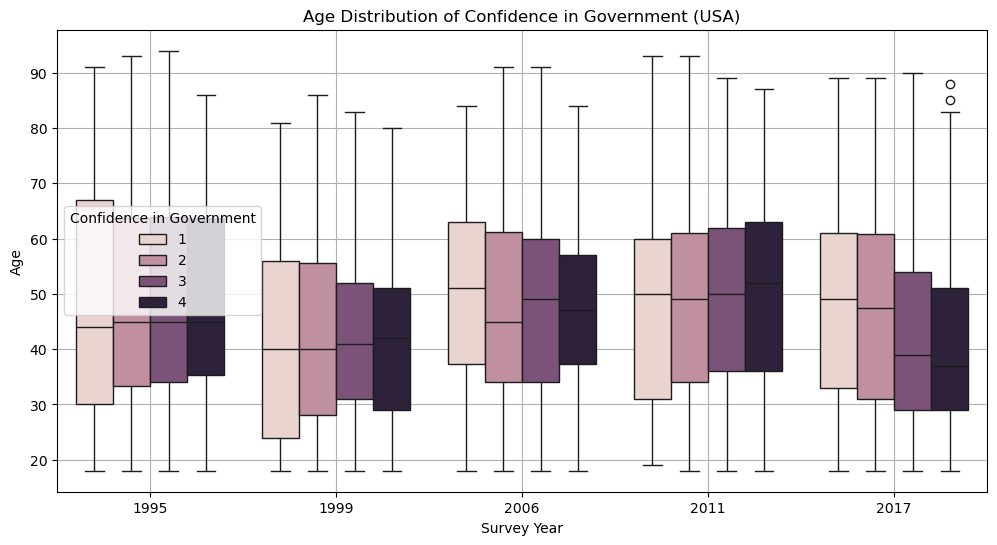

In [64]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_usa, x="Survey year", y="Age", hue="C Government")
plt.title("Age Distribution of Confidence in Government (USA)")
plt.xlabel("Survey Year")
plt.ylabel("Age")
plt.legend(title="Confidence in Government")
plt.grid(True)
plt.show()


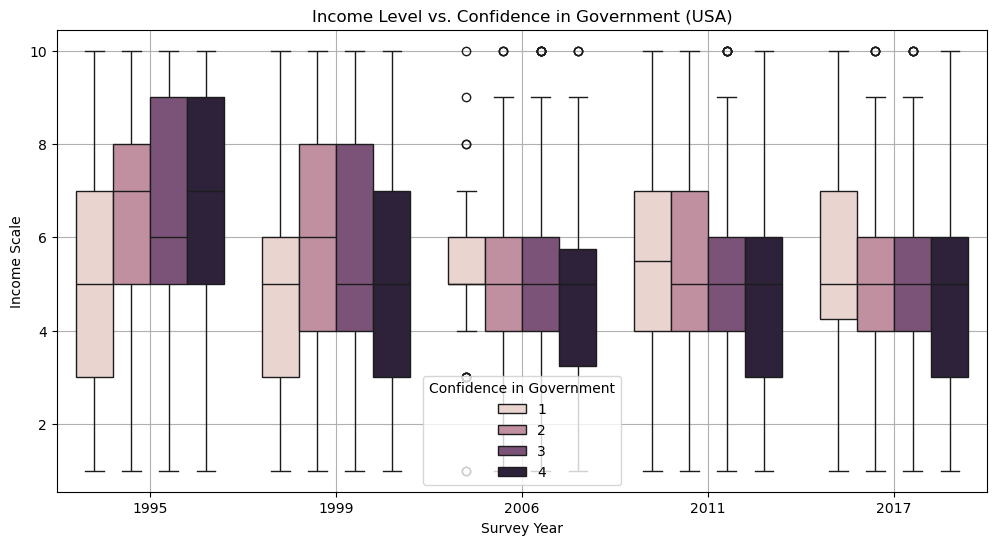

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_usa, x="Survey year", y="Scale of incomes", hue="C Government")
plt.title("Income Level vs. Confidence in Government (USA)")
plt.xlabel("Survey Year")
plt.ylabel("Income Scale")
plt.legend(title="Confidence in Government")
plt.grid(True)
plt.show()


Your visualizations provide valuable insights into the **trend of confidence in government over time in the USA** and its relationship with different institutional and demographic factors.

### **Key Observations from the Visualizations:**
1. **Overall Trend of Confidence in Government (First Plot)**
   - Confidence in government **declined significantly from 2006 onward**.
   - It peaked around **2000-2006** but then declined over time, reaching its lowest in the most recent years.
   - This decline could be linked to **political instability, economic conditions, or declining trust in institutions**.

2. **Institutional Trust Trends (Second Plot)**
   - **Trust in Elections**: Declined sharply in recent years.
   - **Trust in Courts**: Initially rose but then **declined gradually**.
   - **Trust in Political Parties**: Remained **consistently low**.
   - **Trust in NGOs**: Showed a **gradual downward trend**.
   - This suggests that **trust in core democratic institutions** has been weakening, which could be contributing to **declining confidence in government**.

3. **Age and Confidence in Government (Third Plot - Box Plot)**
   - Older individuals generally exhibit **higher confidence in government**.
   - Younger individuals tend to have **lower confidence**, possibly due to increasing dissatisfaction with governance and political representation.
   - The overall trend shows that **confidence in government is lower across all age groups in recent years.**

4. **Income and Confidence in Government (Fourth Plot - Box Plot)**
   - **Higher-income individuals tend to show lower confidence in government**.
   - **Lower-income individuals exhibit more variability** but also show signs of declining confidence.
   - This suggests that economic inequality **may play a role in shaping perceptions of government effectiveness**.

---

### **Interpretation & Next Steps**
✅ The results suggest that **declining trust in institutions (elections, courts, political parties) may be driving lower confidence in government**.
✅ **Age and income** also play a role—older individuals and lower-income groups may have slightly more confidence, but **overall, the trend is downward**.
✅ **Further Analysis**: A time-series regression model could help quantify the **strength of each factor’s influence** on confidence in government over time.

Would you like to proceed with **time-series regression modeling** next to statistically analyze these trends? 🚀

### Model fit

In [66]:
# SEE THE R CODE WVS.R

**Trust in Political Institutions Over Time: A Longitudinal Analysis**

## **1. Introduction**
Trust in political institutions is a critical indicator of democratic stability and governance effectiveness. This analysis investigates how trust in institutions such as government, parliament, political parties, courts, and armed forces has evolved over time in the United States. Using a **Cumulative Link Mixed Model (CLMM)**, we assess trends in institutional trust while accounting for variations across survey years.

## **2. Model Specification**
The CLMM equation for this study is:

\[
log \left( \frac{P(Y \leq k)}{P(Y > k)} \right) = \beta_0^{(k)} + \beta_1(\text{Institution}) + \beta_2(\text{Age}) + \beta_3(\text{Education Level}) + \beta_4(\text{Income}) + u_{\text{Survey Year}}
\]

### **Assumptions of the CLMM:**
- **Proportional Odds Assumption** (Parallel Regression)
- **Survey Year follows a normal distribution** as a random intercept
- **No Multicollinearity** among independent variables
- **Ordinal Nature of Trust Levels**, ensuring meaningful interpretation

### **Limitations:**
- Uses **only a random intercept** for survey year
- If **proportional odds assumption** is violated, interpretation of coefficients may be incorrect
- **Limited diagnostic tools** for CLMM compared to simpler models
- **Potential unobserved confounders**, such as media influence and political events, are not directly accounted for.

## **3. Results and Interpretation**

### **3.1. Key Findings from Model Estimates**
| Variable | Estimate | p-value |
|----------|---------|---------|
| Government | -0.3601 | < 2×10⁻¹⁶ *** |
| Political Parties | 0.2129 | 5.42×10⁻¹² *** |
| Armed Forces | -2.5870 | < 2×10⁻¹⁶ *** |
| Courts | 0.2744 | < 2×10⁻¹⁶ *** |
| Age | -0.0048 | < 2×10⁻¹⁶ *** |
| Highest Educational Level (1) | -0.4489 | 5.17×10⁻⁴ *** |
| Highest Educational Level (2) | -0.5446 | 1.11×10⁻⁸ *** |
| Highest Educational Level (3) | -0.3464 | 1.9×10⁻⁵ *** |
| Scale of Incomes | -0.0077 | 0.056 . |

- **Government Trust:** Decreasing over time (-0.3601), with high statistical significance.
- **Political Parties:** Slight increase in trust (0.2129), though still low in comparison to other institutions.
- **Armed Forces:** Significant decline in trust (-2.5870), indicating a major shift in public perception.
- **Courts:** Increase in trust (0.2744), possibly indicating stability in judicial confidence.
- **Demographic Effects:**
  - **Age** is negatively associated with trust (-0.0048), meaning older individuals tend to express lower trust.
  - **Higher education levels** correlate with lower trust in government.
  - **Income level effects are not statistically significant (p = 0.056).**

### **3.2. Visualization Insights**
#### **3.2.1. Trust in Political Institutions Over Time**
- **Figure 1: Predicted Trust Levels (Bar Chart)**
  - Trust in **Parliament, Government, Political Parties, Armed Forces, and Courts** varies across survey years.
  - **Political parties** show a gradual increase, while trust in **government and armed forces declines.**
  
- **Figure 2: Trust Trends (Line Graph)**
  - Political parties exhibit a steady **increase in trust** since 1995.
  - Trust in government initially remained stable but **declined sharply after 2010.**
  - Courts show a **modest increase** in trust over time.
  - Armed forces have seen the most **dramatic decline** in trust, suggesting a shift in public perception.

## **4. Conclusion**
The findings suggest a **decline in trust in government and armed forces**, while confidence in political parties and courts shows relative stability or minor improvement. **Education level and age significantly influence trust**, with higher education levels correlating with **lower confidence in institutions**. Income does not play a statistically significant role in shaping institutional trust.

These results highlight the **importance of governance, media influence, and political events** in shaping public trust. Future research should explore the impact of external socio-political factors on institutional confidence.

**Key Takeaway:** The evolution of trust in political institutions is complex, shaped by governance performance, societal changes, and demographic factors.

